In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
custom_palette = sns.color_palette(['#E24A33', '#348ABD', '#988ED5', '#777777', '#FBC15E', '#8EBA42', '#FFB5B8'])

In [3]:
data_df = pd.read_csv('./data/essential_oil_molecular_distance.csv')
data_df

,Co-occurence In,SMILES A,SMILES B,cFP edit distance value,cFP edit distance,tanimoto distance value,tanimoto distance,POM distance value,POM distance,Carey et al. neural distance value,Carey et al. neural distance,Hallem and Carlson neural distance value,Hallem and Carlson neural distance,Chae et al. neural distance value,Chae et al. neural distance
0,NaN,CC(C)[C@@H]1CC[C@@H](C)CC1=O,CCCCCCCCCC(=O)OCC,81.0,19017,0.951220,17523,1.318330,20023,NaN,NaN,NaN,NaN,NaN,NaN
1,"Spearmint, Mentha spicata crispa, extract, Men...",CC(C)[C@@H]1CC[C@@H](C)CC1=O,CC(C)=CCCC(C)(O)C=C,61.0,9893,0.976744,21593,1.065346,11574,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,CC(C)[C@@H]1CC[C@@H](C)CC1=O,COc1ccc(CC=C)cc1,67.0,12857,0.926829,13444,1.185299,15507,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,CC(C)[C@@H]1CC[C@@H](C)CC1=O,C[C@H]1CC[C@H](CC2=C1CC[C@@H]2C)C(C)(C)OC(C)=O,77.0,17650,0.822222,3476,0.878223,6736,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,CC(C)[C@@H]1CC[C@@H](C)CC1=O,CNc1ccccc1C(=O)OC,66.0,12498,0.930233,13996,1.167518,14915,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22786,NaN,CC(/CO)=C\CC[C@]1(C)[C@H]2CC[C@H](C2)C1=C,CC(=O)OC(C)(C)C1CCC(=CC1)C,81.0,18954,0.883333,7444,0.886487,6901,NaN,NaN,NaN,NaN,NaN,NaN
22787,NaN,CC(/CO)=C\CC[C@]1(C)[C@H]2CC[C@H](C2)C1=C,CCCCCCCCCC(C)O,88.0,21022,0.940000,15431,0.790179,5106,NaN,NaN,NaN,NaN,NaN,NaN
22788,"Cedar leaf oil, China",CC1(C)C2CCC(C)(C2)C1=O,CC(=O)OC(C)(C)C1CCC(=CC1)C,58.0,8496,0.872340,6478,1.040808,10838,NaN,NaN,NaN,NaN,NaN,NaN
22789,NaN,CC1(C)C2CCC(C)(C2)C1=O,CCCCCCCCCC(C)O,73.0,15765,0.973684,20907,1.250822,17712,NaN,NaN,NaN,NaN,NaN,NaN


# Figure 4

In [4]:
viz_df = data_df.copy()
random_rank = len(viz_df) // 2
viz_df = data_df.melt(
    id_vars=['Co-occurence In'],
    value_vars = [v for v in data_df.columns if v.endswith('distance')], 
    var_name='metrics', 
    value_name='original_rank')
viz_df['group'] = ['co-occuring' if isinstance(v, str) else 'non co-occuring' for v in viz_df['Co-occurence In']]
viz_df['rank'] = viz_df['original_rank'] - random_rank
viz_df

,Co-occurence In,metrics,original_rank,group,rank
0,NaN,cFP edit distance,19017.0,non co-occuring,7622.0
1,"Spearmint, Mentha spicata crispa, extract, Men...",cFP edit distance,9893.0,co-occuring,-1502.0
2,NaN,cFP edit distance,12857.0,non co-occuring,1462.0
3,NaN,cFP edit distance,17650.0,non co-occuring,6255.0
4,NaN,cFP edit distance,12498.0,non co-occuring,1103.0
...,...,...,...,...,...
136741,NaN,Chae et al. neural distance,NaN,non co-occuring,NaN
136742,NaN,Chae et al. neural distance,NaN,non co-occuring,NaN
136743,"Cedar leaf oil, China",Chae et al. neural distance,NaN,co-occuring,NaN
136744,NaN,Chae et al. neural distance,NaN,non co-occuring,NaN


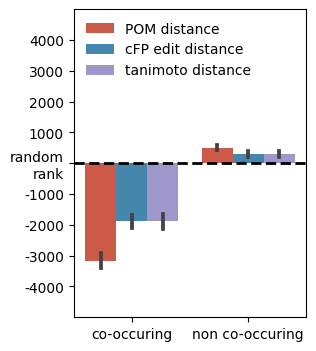

In [5]:
YLIM_SIZE = 5000

plt.figure(figsize=(3, 4), dpi=500)
ax = sns.barplot(
    data=viz_df,
    x='group',
    y='rank',
    hue='metrics',
    order=['co-occuring', 'non co-occuring'],
    hue_order=[
        'POM distance',
        'cFP edit distance',
        'tanimoto distance',
    ],
    palette=custom_palette,
)
plt.axhline(0, ls='--', c='k', lw=2)
plt.yticks([-4000, -3000, -2000, -1000, 0, 1000, 2000, 3000, 4000],
           [-4000, -3000, -2000, -1000, 'random\nrank', 1000, 2000, 3000, 4000])
plt.ylabel('')
plt.xlabel('')
plt.legend(loc='upper right', bbox_to_anchor=(1.45, 1), facecolor='w', edgecolor='w')
plt.legend(loc='upper left', facecolor='w', edgecolor='w')
plt.ylim(-YLIM_SIZE, +YLIM_SIZE)
ax.set_facecolor((1, 1, 1))
plt.gcf().set_dpi(100)
plt.show()

# Extended Data Figure 11

In [6]:
carey_viz_df = data_df[data_df['Carey et al. neural distance'].notnull()].copy()
for c in carey_viz_df.columns:
    if c.endswith('distance'):
        carey_viz_df[c] = carey_viz_df[c].rank()
random_rank = len(carey_viz_df) // 2
carey_viz_df = carey_viz_df.melt(
    id_vars=['Co-occurence In'],
    value_vars = [v for v in carey_viz_df.columns if v.endswith('distance')], 
    var_name='metrics', 
    value_name='original_rank')
carey_viz_df['group'] = ['co-occuring' if isinstance(v, str) else 'non co-occuring' for v in carey_viz_df['Co-occurence In']]
carey_viz_df['rank'] = carey_viz_df['original_rank'] - random_rank
carey_viz_df = carey_viz_df.replace('Carey et al. neural distance', 'neural distance')

In [7]:
hc_viz_df = data_df[data_df['Hallem and Carlson neural distance'].notnull()].copy()
for c in hc_viz_df.columns:
    if c.endswith('distance'):
        hc_viz_df[c] = hc_viz_df[c].rank()
random_rank = len(hc_viz_df) // 2
hc_viz_df = hc_viz_df.melt(
    id_vars=['Co-occurence In'],
    value_vars = [v for v in hc_viz_df.columns if v.endswith('distance')], 
    var_name='metrics', 
    value_name='original_rank')
hc_viz_df['group'] = ['co-occuring' if isinstance(v, str) else 'non co-occuring' for v in hc_viz_df['Co-occurence In']]
hc_viz_df['rank'] = hc_viz_df['original_rank'] - random_rank
hc_viz_df = hc_viz_df.replace('Hallem and Carlson neural distance', 'neural distance')

In [8]:
chae_viz_df = data_df[data_df['Chae et al. neural distance'].notnull()].copy()
for c in chae_viz_df.columns:
    if c.endswith('distance'):
        chae_viz_df[c] = chae_viz_df[c].rank()
random_rank = len(chae_viz_df) // 2
chae_viz_df = chae_viz_df.melt(
    id_vars=['Co-occurence In'],
    value_vars = [v for v in chae_viz_df.columns if v.endswith('distance')], 
    var_name='metrics', 
    value_name='original_rank')
chae_viz_df['group'] = ['co-occuring' if isinstance(v, str) else 'non co-occuring' for v in chae_viz_df['Co-occurence In']]
chae_viz_df['rank'] = chae_viz_df['original_rank'] - random_rank
chae_viz_df = chae_viz_df.replace('Chae et al. neural distance', 'neural distance')

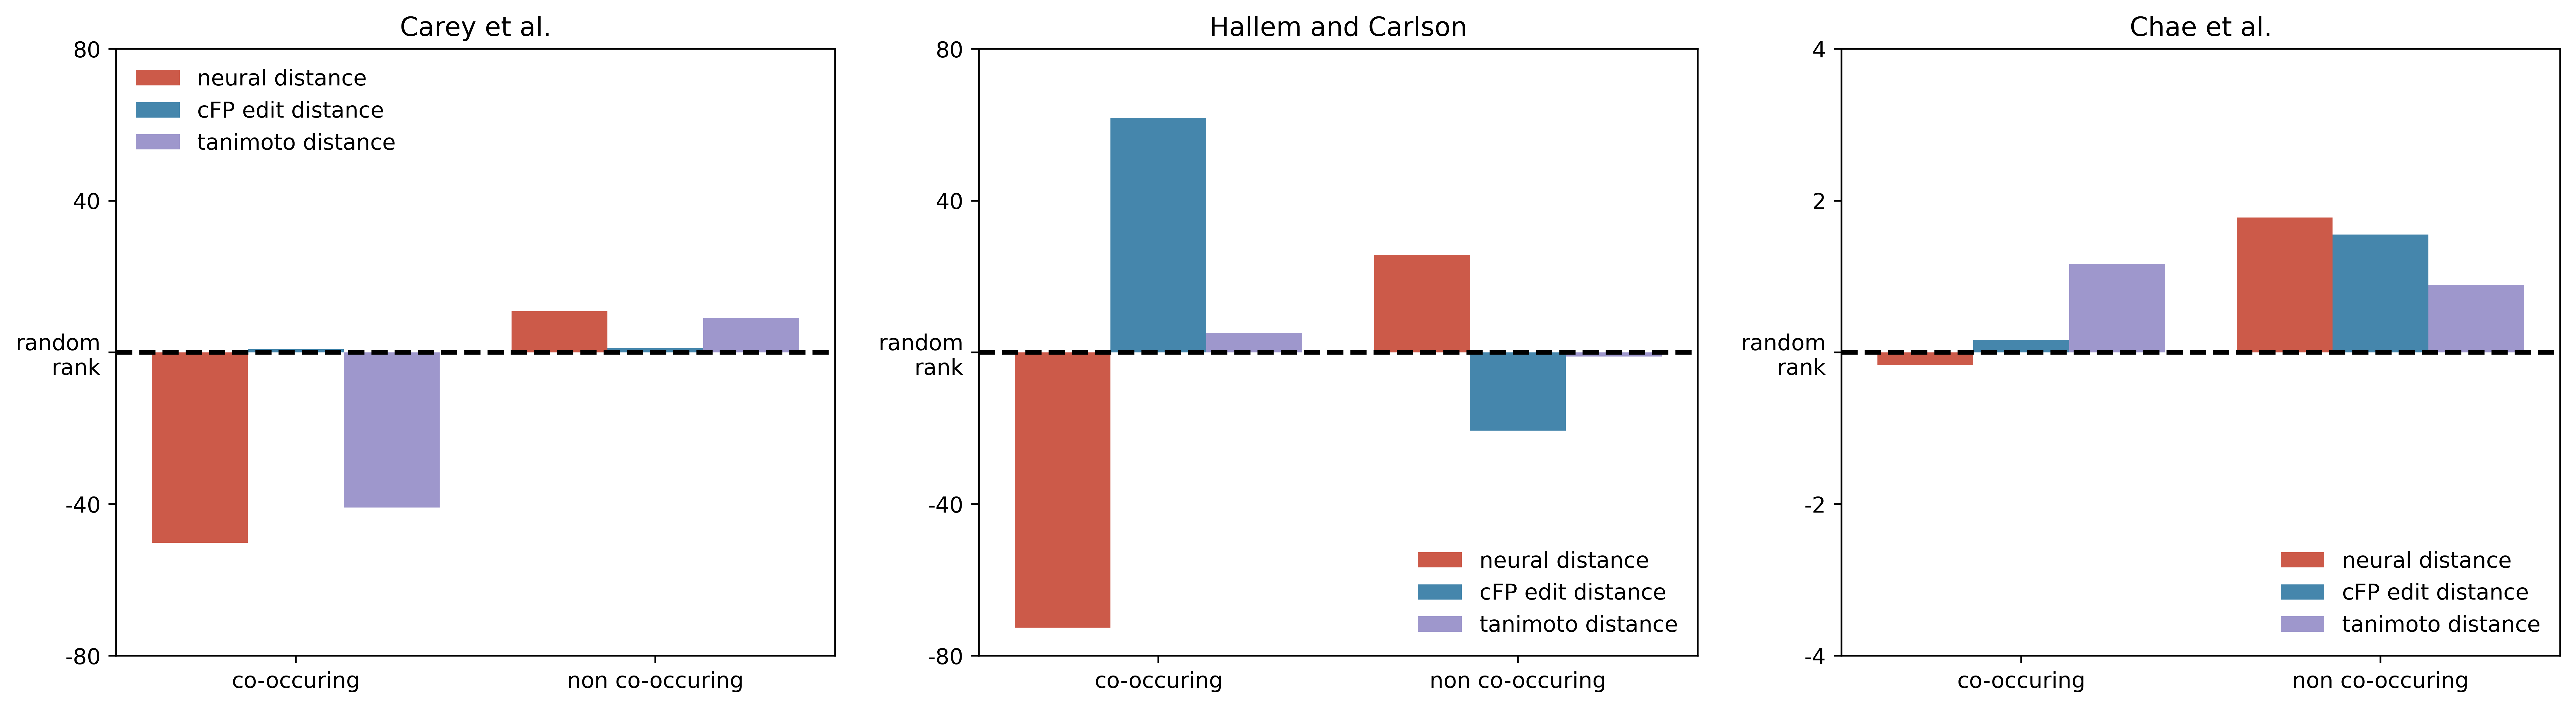

In [9]:
def _barplot(df):
    sns.barplot(
        data=df,
        x='group',
        y='rank',
        hue='metrics',
        order=['co-occuring', 'non co-occuring'],
        hue_order=[
            'neural distance',
            'cFP edit distance',
            'tanimoto distance',
        ],
        palette=custom_palette,
        errorbar=None,
    )
    plt.axhline(0, ls='--', c='k', lw=2)
    plt.ylabel('')
    plt.xlabel('')

plt.figure(figsize=(20, 5), dpi=500)
plt.subplot(1, 3, 1)
_barplot(carey_viz_df)
plt.title("Carey et al.")
plt.yticks([-80, -40, 0, 40, 80], [-80, -40, "random\nrank", 40, 80])
plt.ylim(-80, 80)
plt.legend(loc="upper left", facecolor="w", edgecolor="w")
plt.subplot(1, 3, 2)
_barplot(hc_viz_df)
plt.title("Hallem and Carlson")
plt.yticks([-80, -40, 0, 40, 80], [-80, -40, "random\nrank", 40, 80])
plt.ylim(-80, 80)
plt.legend(loc="lower right", facecolor="w", edgecolor="w")
plt.subplot(1, 3, 3)
_barplot(chae_viz_df)
plt.title("Chae et al.")
plt.yticks([-4, -2, 0, 2, 4], [-4, -2, "random\nrank", 2, 4])
plt.ylim(-4, 4)
plt.legend(loc="lower right", facecolor="w", edgecolor="w")
plt.show()